# Python for Machine Learning

### *Session \#4*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Naive Bayes

### Warm Ups

*Type the given code into the cell below*

---

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
from yellowbrick.target import ClassBalance


from sklearn.pipeline import make_pipeline

df = pd.read_csv("spam.csv", encoding = 'latin-1')

**Vectorize the words:** 
```
preprocess = CountVectorizer(stop_words='english', max_df=8, ngram_range=(1,3))
```

In [2]:
preprocess = CountVectorizer(stop_words='english', min_df=1, ngram_range=(1,3))

preprocess.fit(df['text'])

preprocess.get_feature_names()

['00',
 '00 easter',
 '00 easter prize',
 '00 sub',
 '00 sub 16',
 '00 subs',
 '00 subs 16',
 '000',
 '000 bonus',
 '000 bonus caller',
 '000 cash',
 '000 cash 000',
 '000 cash await',
 '000 cash needs',
 '000 homeowners',
 '000 homeowners tenants',
 '000 pounds',
 '000 pounds txt',
 '000 price',
 '000 price claim',
 '000 prize',
 '000 prize claim',
 '000 prize jackpot',
 '000 xmas',
 '000 xmas prize',
 '000pes',
 '000pes 48',
 '000pes 48 tb',
 '008704050406',
 '008704050406 sp',
 '008704050406 sp arrow',
 '0089',
 '0089 digits',
 '0089 digits selected',
 '0121',
 '0121 2025050',
 '0121 2025050 visit',
 '01223585236',
 '01223585236 xx',
 '01223585236 xx luv',
 '01223585334',
 '01223585334 cum',
 '01223585334 cum wan',
 '0125698789',
 '0125698789 ring',
 '0125698789 ring ur',
 '02',
 '02 06',
 '02 06 03',
 '02 09',
 '02 09 03',
 '02 claimcode',
 '02 claimcode m39m51',
 '02 user',
 '02 user today',
 '0207',
 '0207 083',
 '0207 083 6089',
 '0207 153',
 '0207 153 9153',
 '0207 153 9996',
 

**Set up pipeline and model:** 
```
model = make_pipeline(preprocess, MultinomialNB())
```

In [3]:
model = make_pipeline(preprocess, MultinomialNB())

**Fit and score model:** 
```
model.fit(df['text'], df['category'])
model.score(df['text'], df['category'])
```

In [4]:
model.fit(df['text'], df['category'])
model.score(df['text'], df['category'])

0.9992821249102656

**Use model on a sentence:** `model.predict(["you're our instant winner!"])`

### Exercises
---

**1. Divide the spam dataset into** `X_train, X_test, y_train, y_test`

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'])

**2. Create a pipeline with a CountVectorizer and a MultinomialNB model**

In [6]:
model = make_pipeline(CountVectorizer(token_pattern=r'\b[^\d\W]+\b'),MultinomialNB())

**3. Fit the model to the spam dataset. What is the accuracy of the model?**

In [7]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9827709978463748

**4. What is the class balance between spam and non-spam?**

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c113ef588>,
             colormap=None, colors=None, labels=None)

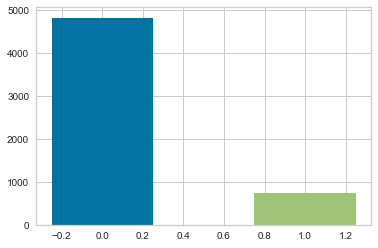

In [8]:
viz = ClassBalance()
viz.fit(df['category'])

**5. Retrain your model using balanced data, utilizing** `RandomOverSampler()`

0.679126065773447

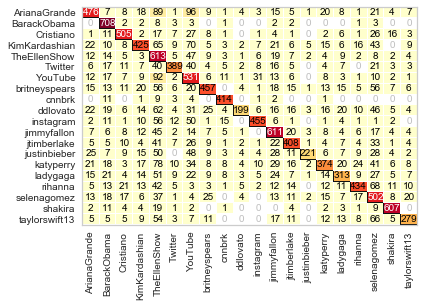

In [44]:
model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=(1,3)),
                      ConfusionMatrix(MultinomialNB()))

model.fit(X_train, y_train)
model.score(X_test, y_test)

## II. Multi-class Classification

### Warm Ups

*Type the given code into the cell below*

---

### Exercises
---

**1. Train a Naive Bayes classifier on all the Twitter data. What is the accuracy of the model?**

In [46]:
df = pd.read_csv("tweets.csv")

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['author'])

model = make_pipeline(CountVectorizer(stop_words='english'), 
                      MultinomialNB())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6602466504263094

**2. Use a** `ClassPredictionError` **plot to determine which celebrities are commonly mistaken for each other**


0.6602466504263094

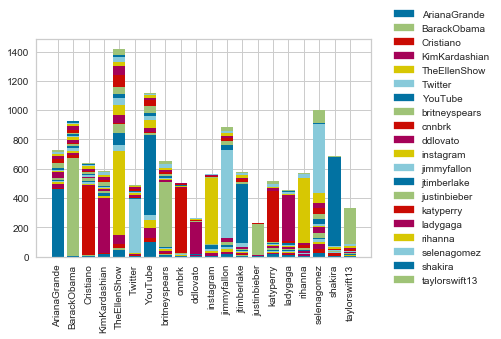

In [48]:
model = make_pipeline(CountVectorizer(stop_words='english'), 
                      ClassPredictionError(MultinomialNB()))

model.fit(X_train, y_train)
model.score(X_test, y_test)

**3. Plot a** `ConfusionMatrix` **of your model. Which celebrity is hardest to classify?**         

0.6602466504263094

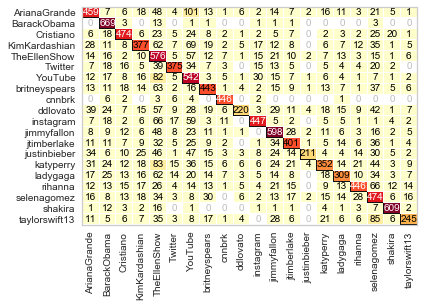

In [49]:
model = make_pipeline(CountVectorizer(stop_words='english'), 
                      ConfusionMatrix(MultinomialNB()))

model.fit(X_train, y_train)
model.score(X_test, y_test)

**4. Change the hyperparameters of your Naive Bayes model to improve performance**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['author'])

model = MultinomialNB(alpha=0.25)

pipeline = make_pipeline(preprocess, model)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6935901339829477

## III. Twitter Bot

### Warm Ups

*Type the given code into the cell below*

---

**Set up Tweepy**

In [7]:
import tweepy
auth = tweepy.OAuthHandler('8hQMoNize5oshYZjaqai1DyVR', 'UhaEatmV6a0PdeuM1RWnsMNOJFHEmyNcFpsYb46czvnPJtzF1E')
auth.set_access_token('3629445439-YGOjZU7i4a455eDEtlUMmnx4koOYi0nax9ixGB7', 'eEwqBLLWKIHZAU9WwOFgAfRhclTNpUYTRG6j4k3EaJCkO')
api = tweepy.API(auth)

**Send a tweet:** `api.update_status()`

**See names of classes:** `model.classes_`

**Make random choices:** 
```python
words = choices(preprocess.get_feature_names(),
                weights=model.feature_count_[1],
                k=4)
```

**Join strings together:** `" ".join(words)`